In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier


import warnings
warnings.filterwarnings('ignore')

# Regression

### Dataset: [Life Expectancy (World Health Organization)](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization. The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country.

Variable Descriptions

country (Nominal) - the country in which the indicators are from 

year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); 

infant_deaths (Ratio) - number of infant deaths per 1000 population; 

alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

measles (Ratio) - number of reported Measles cases per 1000 population

bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; 

gdp (Ratio) - Gross Domestic Product per capita

population (Ratio) - population of a country

thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 

thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

schooling (Ratio) - average number of years of schooling of a population

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  2938
Columns  :  22

Features : 
 ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Missing values :   2563

Unique values :  
 Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

### Data Cleaning and Preperation

In [7]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [8]:
data.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [9]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [10]:
def nulls_breakdown(data=data):
    df_cols = list(data.columns)
    cols_total_count = len(list(data.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = data[col].isnull().sum()
        total_count = data[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))
    
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 10 null values: 0.34% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 34 null values: 1.16% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness__1-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 14 contain null values; 63.64% columns contain null values.


### Filling in missing data

Since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be the best possible method here. Imputation of each year's mean is done below.

In [11]:
imputed_data = []
for year in list(data.year.unique()):
    year_data = data[data.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
data = pd.concat(imputed_data).copy()

nulls_breakdown(data)

Out of 22 total columns, 0 contain null values; 0.0% columns contain null values.


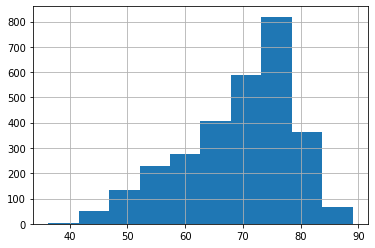

In [12]:
data['life_expectancy'].hist()

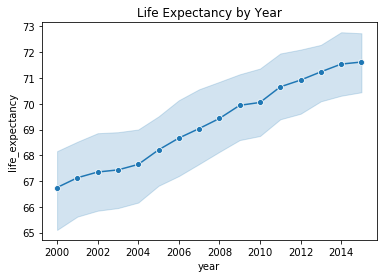

In [13]:
sns.lineplot('year', 'life_expectancy', data=data, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

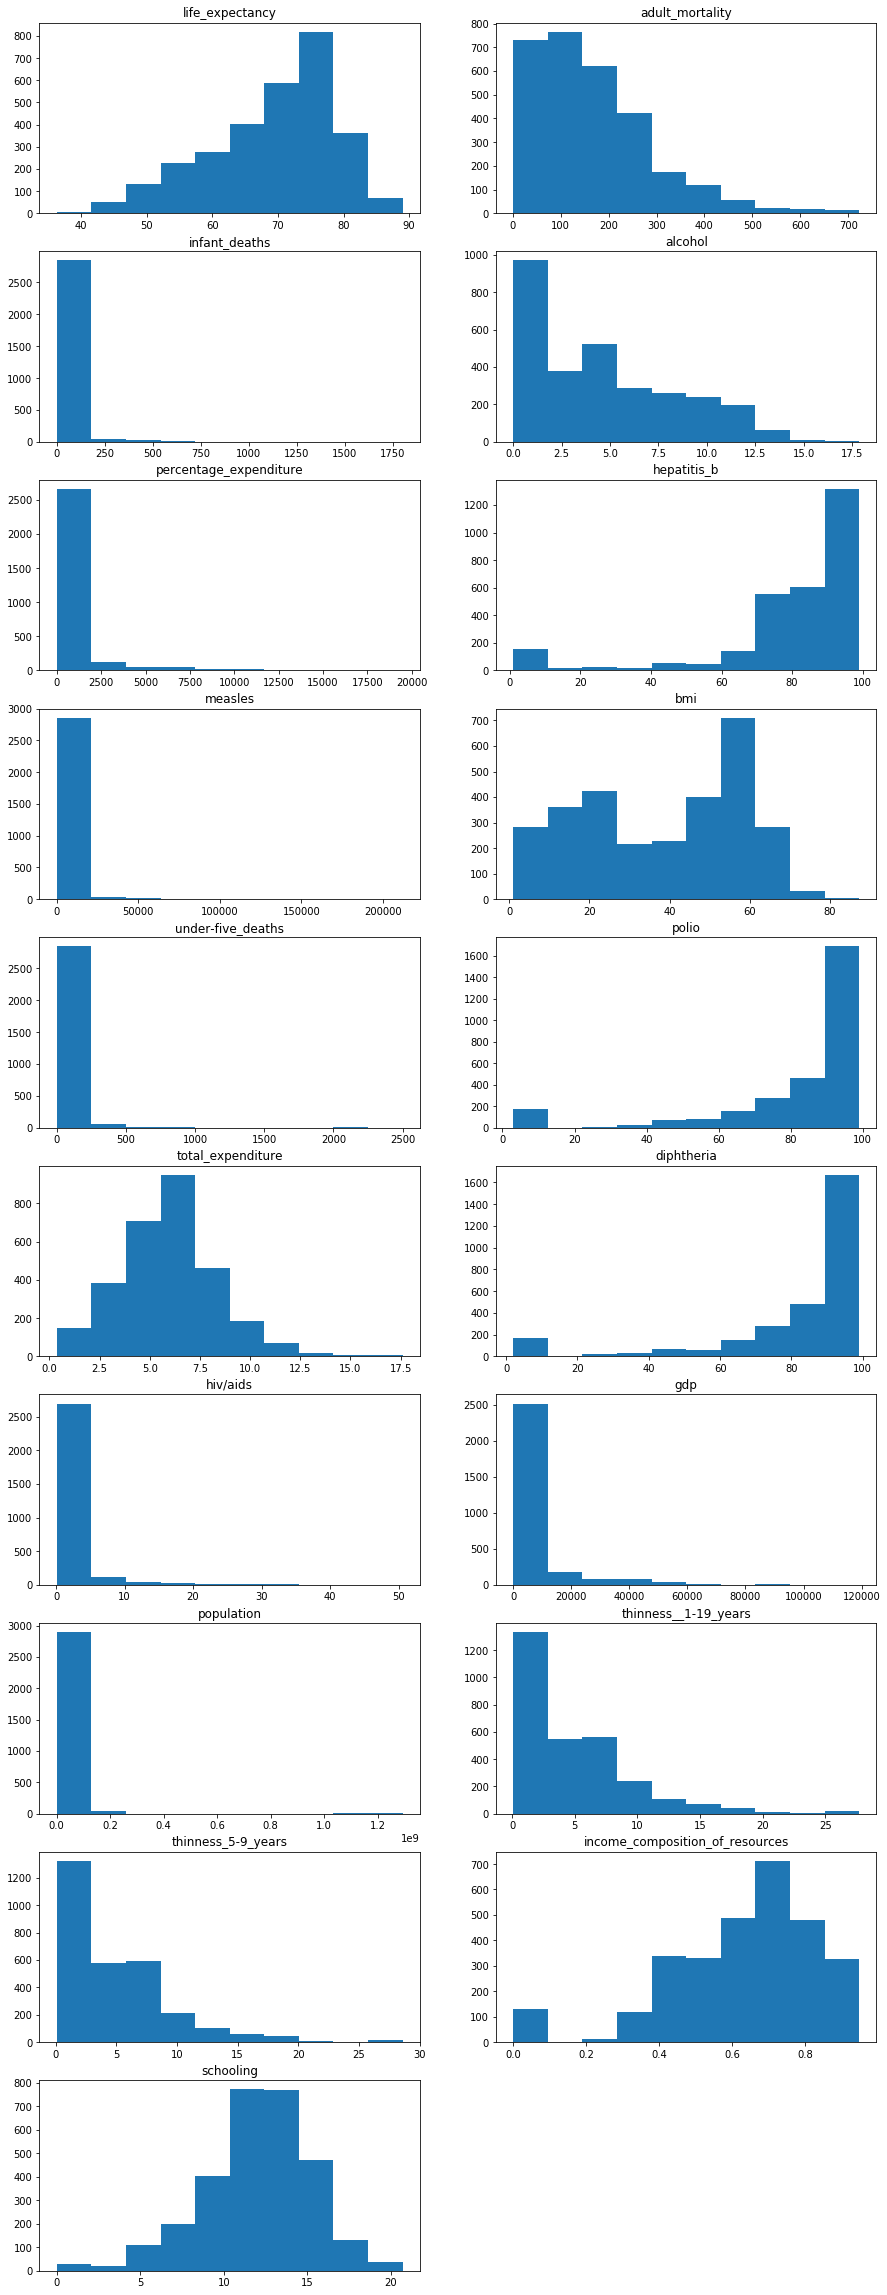

In [14]:
col =['life_expectancy', 'adult_mortality','infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b','measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure','diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
plt.figure(figsize=(15,75))

for i in range(len(col)):
    plt.subplot(18,2,i+1)
    plt.hist(data[col[i]])
    plt.title(col[i])

plt.show()

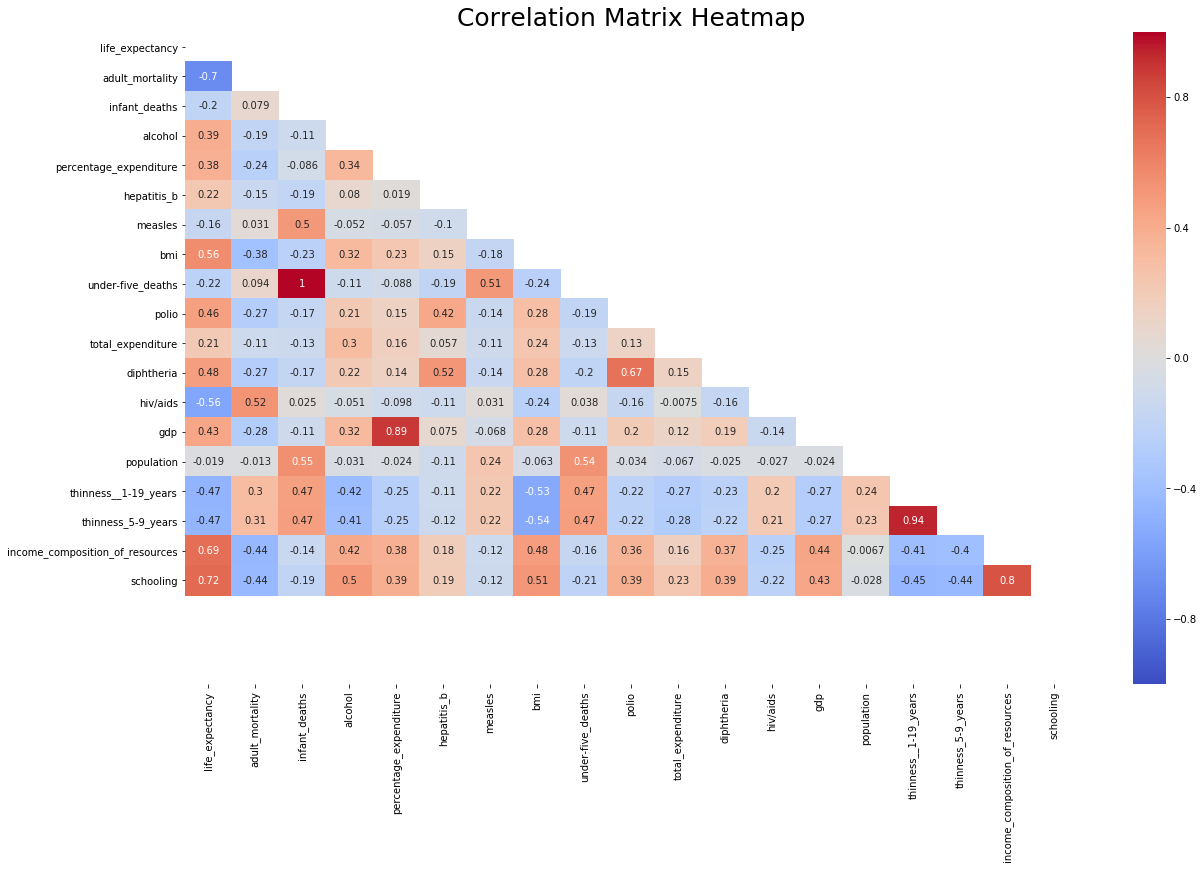

In [15]:
mask = np.triu(data[col].corr())
plt.figure(figsize=(20,12))
sns.heatmap(data[col].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(len(data.columns), 0)
plt.title('Correlation Matrix Heatmap', fontsize =25)
plt.show()

Some observations from the correlation matrix:

Life Expectancy appears to be relatively highly correlated with Adult Mortality (negative), HIV/AIDS (negative), Income Composition of Resources (positive), Schooling (positive).

Life expectancy is extremely lowly correlated to population.

Infant deaths and Under Five deaths are extremely highly correlated.

Percentage Expenditure and GDP are relatively highly correlated.

Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates.

Polio vaccine rate and Diphtheria vaccine rate are very positively correlated.

HIV/AIDS is relatively negatively correlated with Income Composition of Resources.

Income Composition of Resources and Schooling are very highly correlated.

In [16]:
target = data.life_expectancy.values

features = data.drop(['life_expectancy','country', 'year', 'status'],axis=1)
features_encoded = pd.get_dummies(features)

Since country, year and status features do not contribute to determining the life expectancy, we will be dropping these values from our feature set.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2,random_state =1)

### Scaling
Used min max scaler as values should be comparable. In other words, the shape of the dataset needs to be maintained. We scale numeric values in range of 0 to 1


In [18]:
scaler = MinMaxScaler()
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [19]:
classifier = []
mean_cv_train_score = []
mean_cv_test_score = []
train_score = []
test_score = []
mae_score_test = []
best_cv_score = []

### Regressor 1 : KNN with grid search

In [20]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8]}
clf = GridSearchCV(knn, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [21]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002865,0.000758,0.012745,0.001948,2,{'n_neighbors': 2},0.912601,0.866311,0.897001,0.890955,...,0.891025,0.014964,5,0.964806,0.971327,0.966865,0.969571,0.970348,0.968583,0.002402
1,0.002454,0.000079,0.013338,0.001186,3,{'n_neighbors': 3},0.913950,0.882694,0.900111,0.901703,...,0.896536,0.011712,2,0.947065,0.955562,0.949113,0.949988,0.951730,0.950692,0.002861
2,0.002434,0.000079,0.013934,0.001171,4,{'n_neighbors': 4},0.906361,0.887732,0.897952,0.909543,...,0.897319,0.009748,1,0.936810,0.945076,0.939370,0.939420,0.940754,0.940286,0.002714
3,0.002415,0.000042,0.014656,0.001114,5,{'n_neighbors': 5},0.897585,0.883938,0.894370,0.904844,...,0.891806,0.009534,3,0.929707,0.936430,0.931824,0.931651,0.932687,0.932460,0.002211
4,0.002473,0.000066,0.015316,0.001169,6,{'n_neighbors': 6},0.893571,0.886031,0.895959,0.901493,...,0.891238,0.007829,4,0.922773,0.926026,0.925152,0.924251,0.926767,0.924994,0.001394
5,0.002449,0.000056,0.016056,0.001044,7,{'n_neighbors': 7},0.891035,0.883928,0.892177,0.901288,...,0.888755,0.008684,6,0.915312,0.919208,0.919187,0.916910,0.921236,0.918370,0.002053
6,0.002444,0.000045,0.016954,0.001948,8,{'n_neighbors': 8},0.886706,0.880352,0.890619,0.899374,...,0.885819,0.009243,7,0.909351,0.913298,0.913253,0.910175,0.916132,0.912442,0.002437


### Average Cross Validation Test score


In [22]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.891785713505444


### Average Cross Validation Train score


In [23]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.9354039090185949


### Best Cross Validation Score

In [24]:
score6 = float(format(clf.best_score_))
print(score6)

0.897318977620683


### Training score 

In [25]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.9446508619256743


### Test Score

In [26]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.9086190974068394


In [27]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [28]:
mean_absolute_error(y_train, preds_train)

1.4614595395884202

### Mean absolute error : Test

In [29]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

1.8674403367904535


### Best Estimator from grid search was 4 neighbors

In [30]:
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

Text(0, 0.5, 'Training Error Plot')

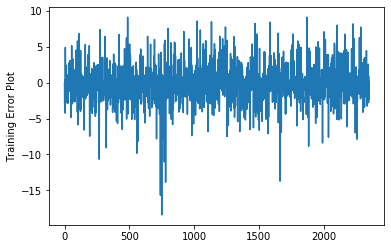

In [31]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

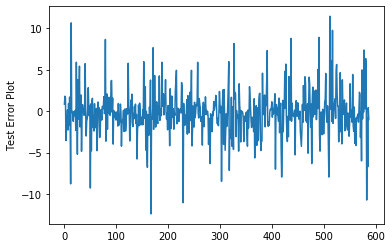

In [32]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [33]:
classifier.append('KNN')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 2: Multiple Linear Regression

In [34]:
reg = LinearRegression()
parameters = {} # No parameters to set.
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

### Avergage Cross Validation Test score

In [35]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.8129770103585419


### Avergage Cross Validation Train score

In [36]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.8191567192534231


### Best Cross Validation Score

In [37]:
score6 = float(format(clf.best_score_))
print(score6)

0.8129770103585419


### Training score

In [38]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.8186766147498776


### Test Score

In [39]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.8114870043300213


In [40]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [41]:
mean_absolute_error(y_train, preds_train)

3.028116061977683

### Mean absolute error : Test

In [42]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

2.9657018985433474


Text(0, 0.5, 'Training Error Plot')

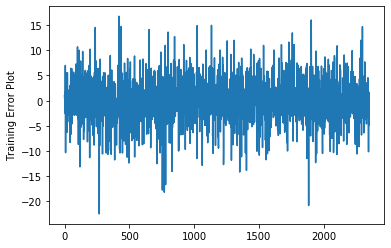

In [43]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

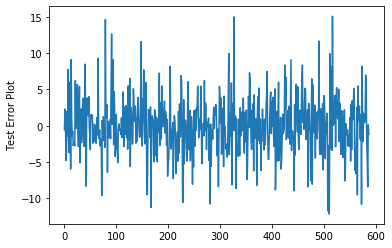

In [44]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [45]:
classifier.append('Linear Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 3 : Ridge Regression

In [46]:
reg = Ridge()
parameters = {'alpha': [.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200, 500]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)
clf.best_params_

{'alpha': 0.001}

### Average Cross Validation Test score

In [47]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.7308552962256561


### Avergage Cross Validation Train score

In [48]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.7347937046655909


### Best Cross Validation Score

In [49]:
score6 = float(format(clf.best_score_))
print(score6)

0.8130198489671802


### Training score

In [50]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.8186643169962778


### Test Score

In [51]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.8116497933417648


In [52]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [53]:
mean_absolute_error(y_train, preds_train)

3.0281536384226206

### Mean absolute error : Test

In [54]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

2.9642505302659448


Text(0, 0.5, 'Training Error Plot')

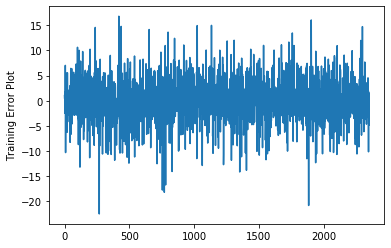

In [55]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

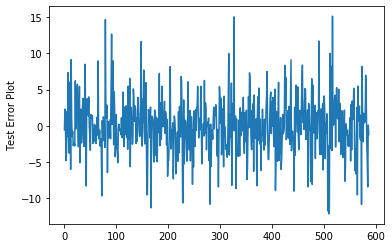

In [56]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [57]:
classifier.append('Ridge Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 4 : Lasso

In [58]:
reg = linear_model.Lasso()
parameters = {'alpha': [.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)
clf.best_params_

{'alpha': 0.001}

### Average Cross Validation Test score

In [59]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.5318386151294442


### Average Cross Validation Train score

In [60]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.5355482455776143


### Best Cross Validation Score

In [61]:
score6 = float(format(clf.best_score_))
print(score6)

0.8111173119192909


### Training score 


In [62]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.8166304901739329


### Test Score

In [63]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.8102143373720562


In [64]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [65]:
mean_absolute_error(y_train, preds_train)

3.0404819063550352

### Mean absolute error : Test

In [66]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

2.9738537541705523


Text(0, 0.5, 'Training Error Plot')

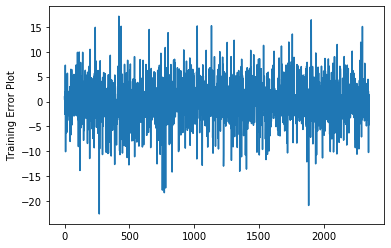

In [67]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

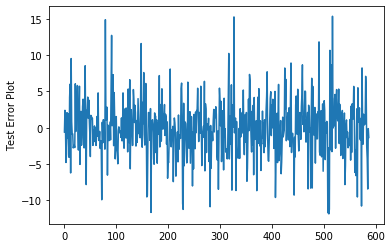

In [68]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [69]:
classifier.append('Lasso Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 5 : Polynomial

In [70]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(x_train_scaled)
reg2 = linear_model.LinearRegression()
parameters = {}
clf = GridSearchCV(reg2, parameters, cv=5, return_train_score=True)
clf.fit(X_, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

### Average Cross Validation Test score

In [71]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.7664200817715506


### Average Cross Validation Train score

In [72]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.9287636807218982


### Best Cross Validation score

In [73]:
score6 = float(format(clf.best_score_))
print(score6)

0.7664200817715506


### Training score

In [74]:
score3 = clf.score(poly.transform(x_train_scaled), y_train)
print(score3)

0.9258181217029642


### Test Score

In [75]:
score4 = clf.score(poly.transform(x_test_scaled), y_test)
print(score4)

0.8820915570123329


In [76]:
preds_test = clf.predict(poly.transform(x_test_scaled))
preds_train = clf.predict(poly.transform(x_train_scaled))

### Mean absolute error : Train

In [77]:
mean_absolute_error(y_train, preds_train)

1.9093338558043278

### Mean absolute error : Test

In [78]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

2.0762774287299726


Text(0, 0.5, 'Training Error Plot')

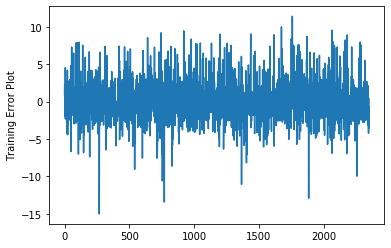

In [79]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

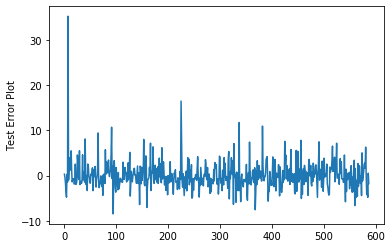

In [80]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [81]:
classifier.append('Polynomial Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 6 : SVM Linear

In [82]:
reg = SVR(kernel='linear')
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1,1, 10, 100]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)
clf.best_params_

{'C': 100, 'gamma': 0.001}

### Average Cross Validation Test score

In [83]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.5532490942825394


### Average Cross Validation Train score

In [84]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.558177453889926


### Best Cross Validation score

In [85]:
score6 = float(format(clf.best_score_))
print(score6)

0.7971752940642626


### Training score

In [86]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.8063169933284903


### Test Score

In [87]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.7980786395150399


In [88]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [89]:
mean_absolute_error(y_train, preds_train)

3.017037628712913

### Mean absolute error : Test

In [90]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

2.9778657292710053


Text(0, 0.5, 'Training Error Plot')

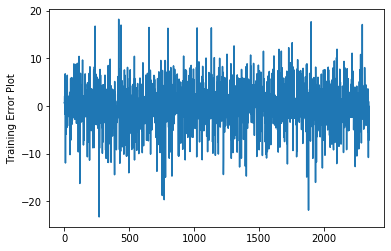

In [91]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

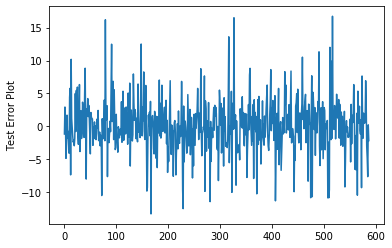

In [92]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [93]:
classifier.append('SVM Linear Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 7 : SVM polynomial kernel

In [94]:
reg = SVR(kernel = 'poly', C=100, gamma='auto')
parameters = {}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

### Average Cross Validation Test score

In [95]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.7614425315565085


### Average Cross Validation Train score

In [96]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.767792322063202


### Best Cross Validation score

In [97]:
score6 = float(format(clf.best_score_))
print(score6)

0.7614425315565085


### Training score

In [98]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.7726188791325364


### Test Score

In [99]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.7663546532346013


In [100]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [101]:
mean_absolute_error(y_train, preds_train)

3.290213578610706

### Mean absolute error : Test

In [102]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

3.2068417755219683


Text(0, 0.5, 'Training Error Plot')

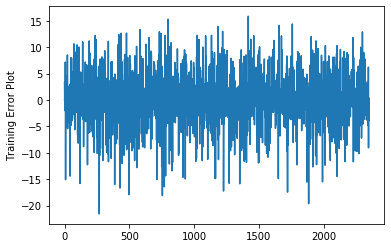

In [103]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

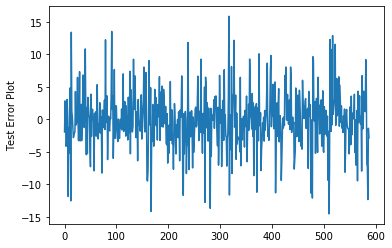

In [104]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [105]:
classifier.append('SVM Poly Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Regressor 8 : SVM RBF kernel

In [106]:
reg = SVR(kernel = 'rbf')
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)
clf.best_params_

{'C': 100, 'gamma': 1}

### Average Cross Validation Test score

In [107]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.3416258935058878


### Average Cross Validation Train score

In [108]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.3879799699468929


### Best Cross Validation score

In [109]:
score6 = float(format(clf.best_score_))
print(score6)

0.9288440696944779


### Training score

In [110]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.9555244160122502


### Test Score

In [111]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.937465874880156


In [112]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

### Mean absolute error : Train

In [113]:
mean_absolute_error(y_train, preds_train)

1.129714125942097

### Mean absolute error : Test

In [114]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

1.5734783466576236


Text(0, 0.5, 'Training Error Plot')

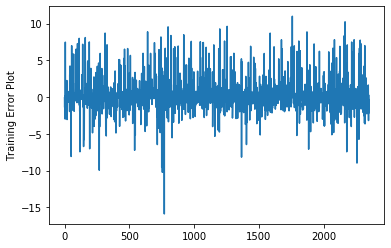

In [115]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

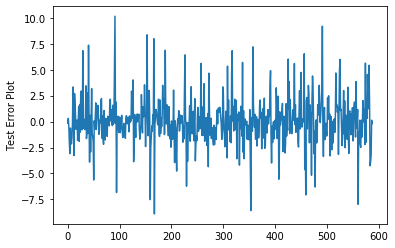

In [116]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [117]:
classifier.append('SVM RBF Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

### Model Comparision

Text(0.5, 1.0, 'Model Comparision : Average CV Test Score')

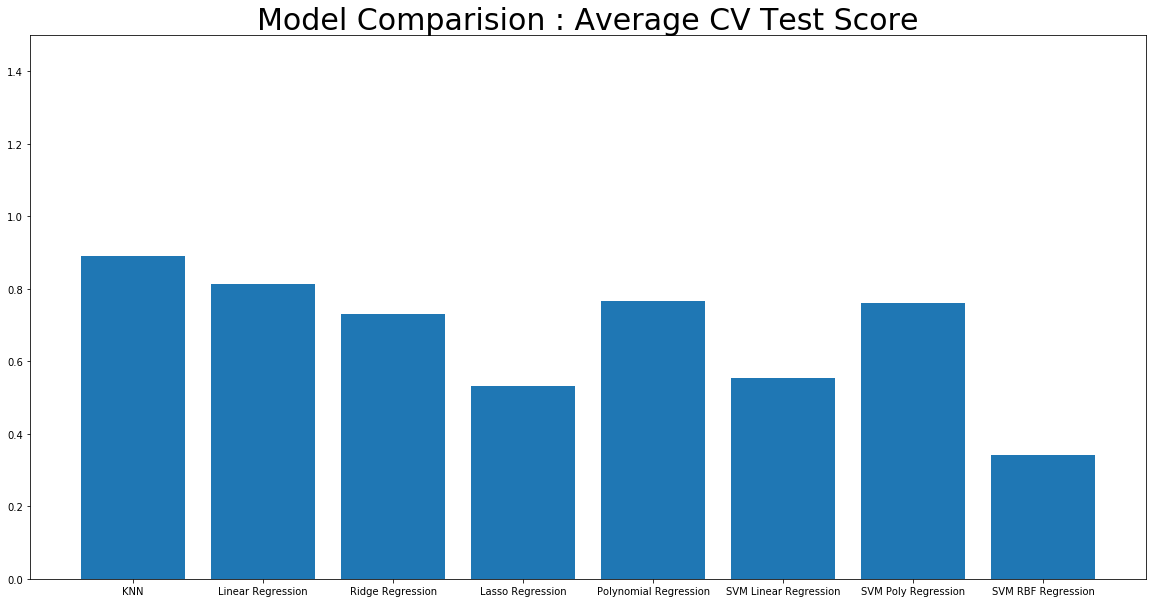

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.ylim(0, 1.5)
plt.bar(classifier, mean_cv_test_score)
plt.title('Model Comparision : Average CV Test Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Average CV Train Score')

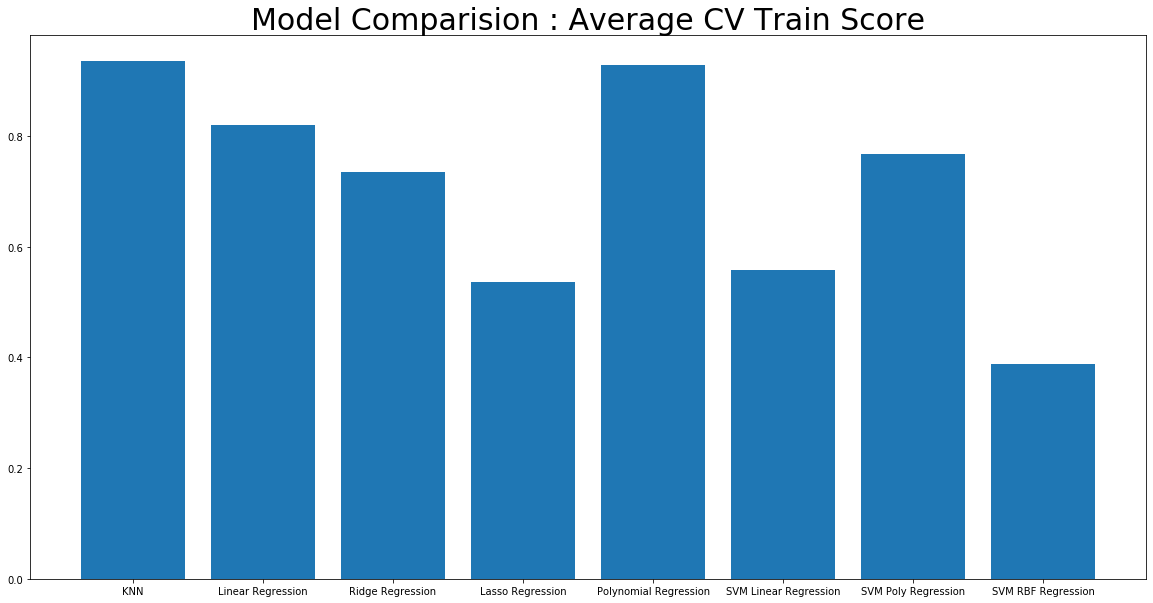

In [119]:
plt.figure(figsize=(20,10))

plt.bar(classifier, mean_cv_train_score)
plt.title('Model Comparision : Average CV Train Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Best CV Score')

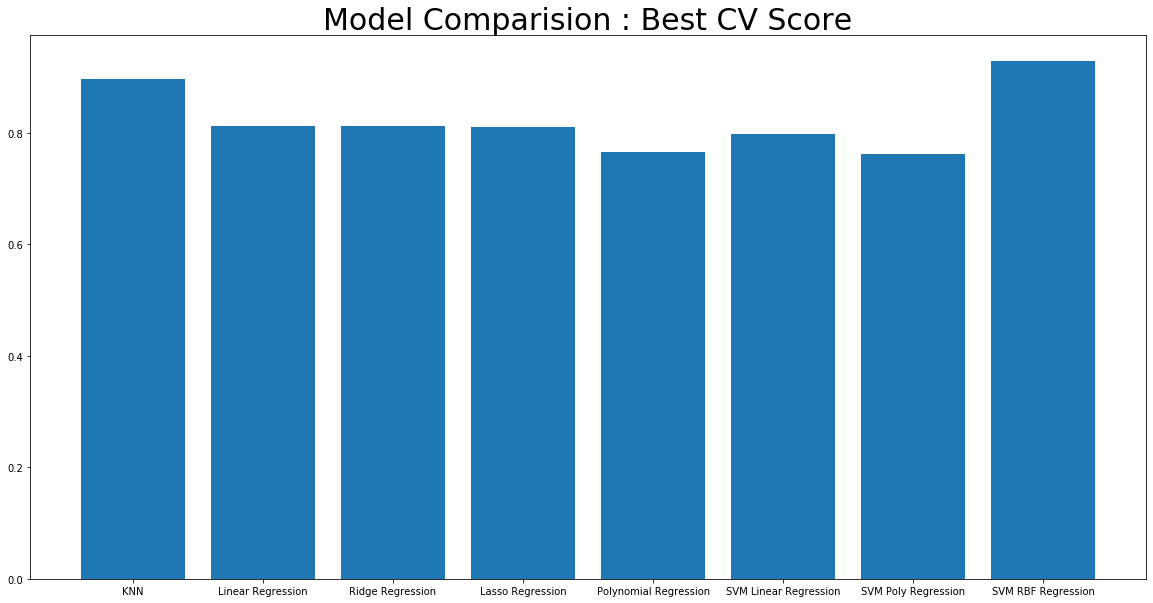

In [120]:
plt.figure(figsize=(20,10))
plt.bar(classifier, best_cv_score)
plt.title('Model Comparision : Best CV Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Mean Absolute Error Test')

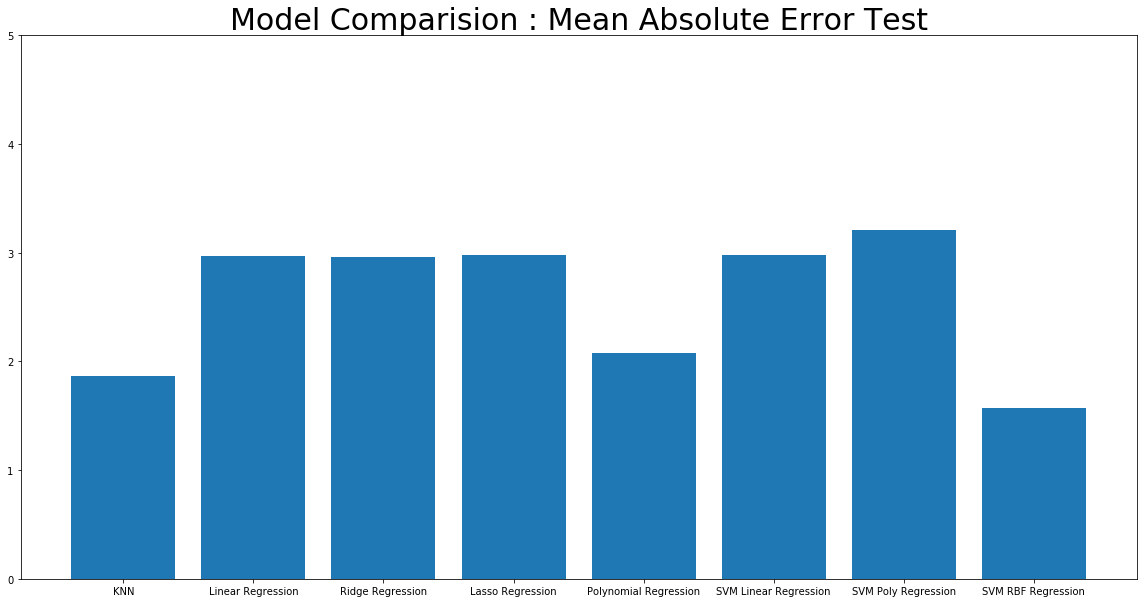

In [121]:
plt.figure(figsize=(20,10))
plt.ylim(0, 5)
plt.bar(classifier, mae_score_test)
plt.title('Model Comparision : Mean Absolute Error Test', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Train Score')

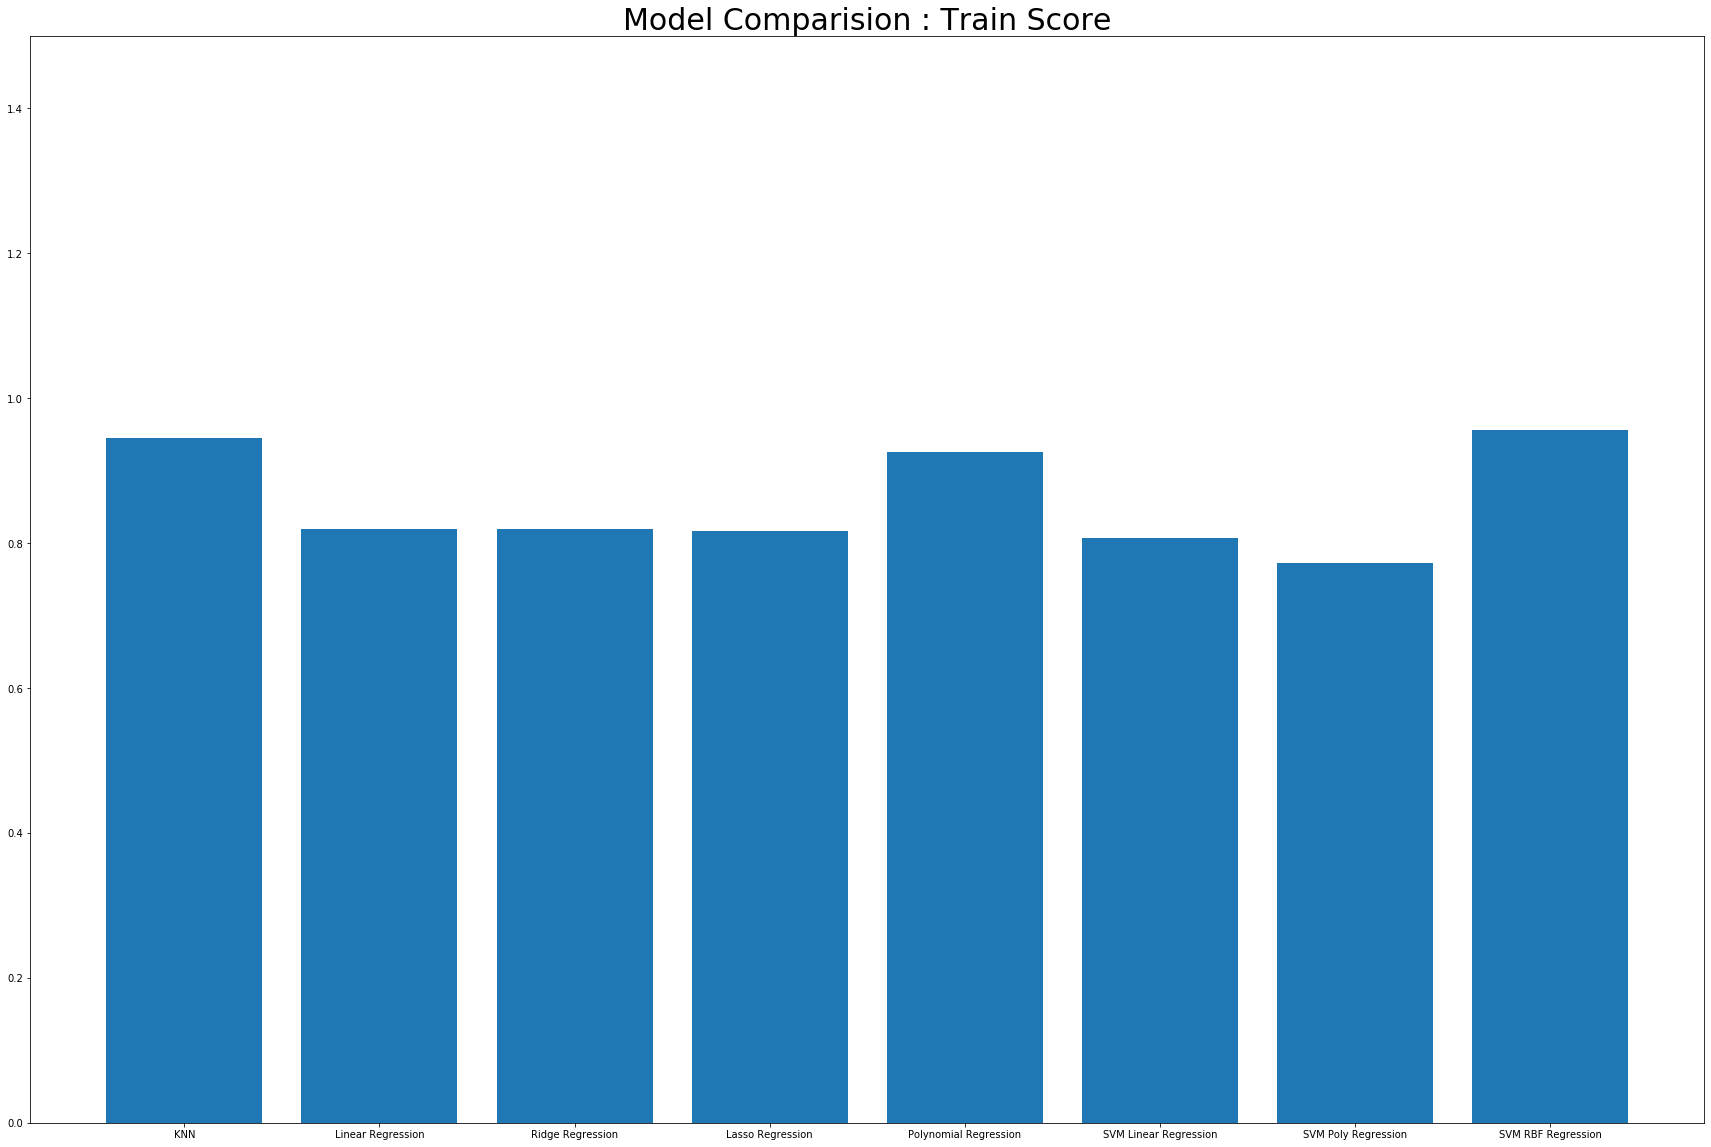

In [122]:
plt.figure(figsize=(30,20))
plt.ylim(0, 1.5)
plt.bar(classifier, train_score)
plt.title('Model Comparision : Train Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Test Score')

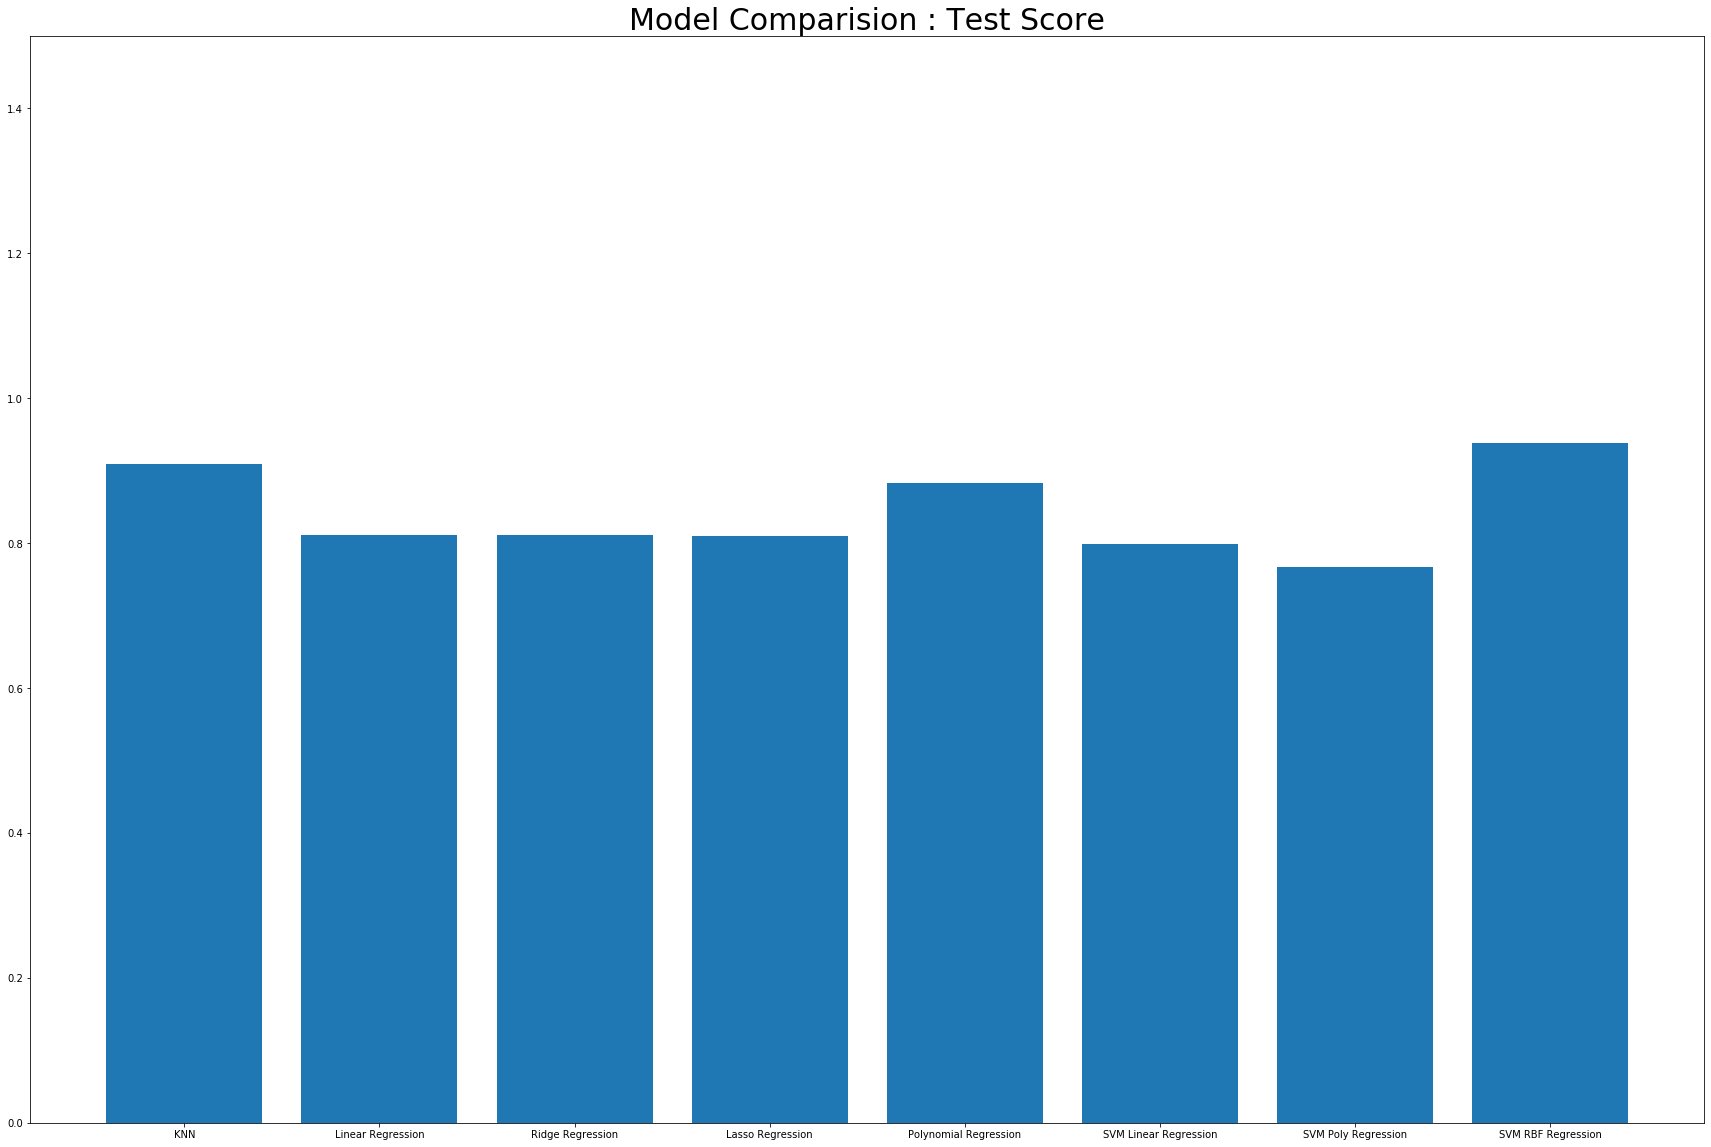

In [123]:
plt.figure(figsize=(30,20))
plt.ylim(0, 1.5)
plt.bar(classifier, test_score)
plt.title('Model Comparision : Test Score', fontsize =30)

From the comparison results, SVM with RBF Kernel has the best cross validation, train & test scores. The model also has the least Mean Absolute error. So we will be selecting SVM with 'rbf' kernel as our best model.

### Training the best model on the entire dataset and predicting the target values

In [124]:
reg = SVR(kernel = 'rbf',C=100)
parameters = {'gamma': [0.5,1.0,0.1]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.5, 1.0, 0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

### Results

In [125]:
results = clf.predict(x_test_scaled)[0:5]
np.around(results, decimals= 2)

array([73.86, 65.89, 63.26, 76.72, 69.09])

# Classification

### Dataset: [Telecom Churn Data](https://www.kaggle.com/venky12347/churn-telecom)

The purpose of this portion of the project is to build classifiers which can most effectively predict if a customer is likely to leave their provider. This dataset contains 3333 rows and 21 features. The features include:
- state - state where customer is located
- account length - the amount of time a customer has remained with the provider (time unit not specified)
- area code 
- phone number
- international plan - indicates whether a customer purchased an international plan
- voice mail plan - indicates whether a customer purchased a voice mail plan
- number vmail messages - number of voicemail messages
- total day minutes - number of minutes used during the day
- total day calls - number of calls made during the day
- total day charge - total cost of all calls made during the day
- total eve minutes - number of minutes used during the evening
- total eve calls - number of calls made during the evening
- total eve charge - total cost of all calls made during the evening
- total night minutes - number of minutes used during the night
- total night calls - number of calls made during the night
- total night charge - total cost of all calls made during the night
- total intl minutes - number of total utilized international minutes
- total intl calls - number of total international calls
- total intl charge - total cost of all international calls
- customer service calls - number of customer service calls
- churn - indicates whether a customer left their provider

In [126]:
data = pd.read_csv("telecom_churn.csv")
print("This dataset contains " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " features.")

This dataset contains 3333 rows and 21 features.


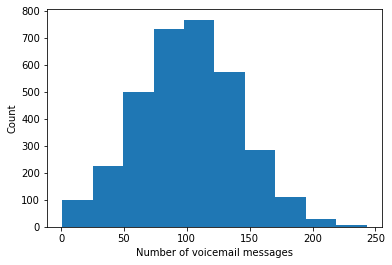

In [127]:
plt.hist(data['account length'])
plt.xlabel('Number of voicemail messages')
plt.ylabel('Count')
plt.show();

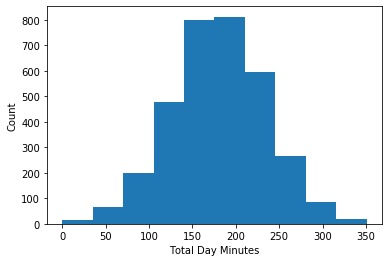

In [128]:
plt.hist(data['total day minutes'])
plt.xlabel('Total Day Minutes')
plt.ylabel('Count')
plt.show();

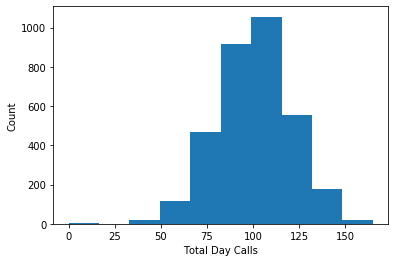

In [129]:
plt.hist(data['total day calls'])
plt.xlabel('Total Day Calls')
plt.ylabel('Count')
plt.show();

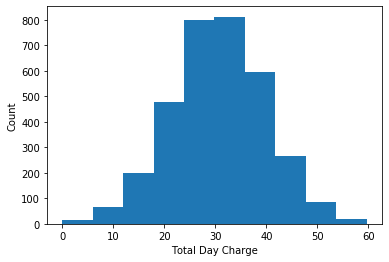

In [130]:
plt.hist(data['total day charge'])
plt.xlabel('Total Day Charge')
plt.ylabel('Count')
plt.show();

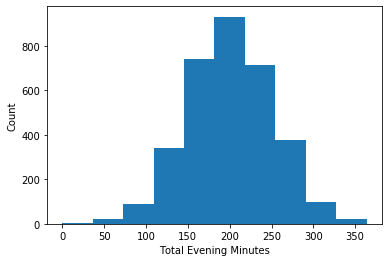

In [131]:
plt.hist(data['total eve minutes'])
plt.xlabel('Total Evening Minutes')
plt.ylabel('Count')
plt.show();

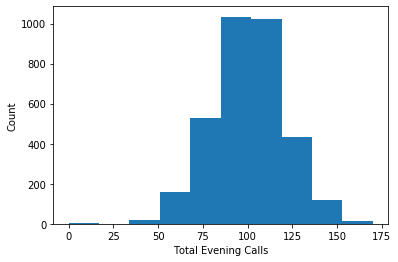

In [132]:
plt.hist(data['total eve calls'])
plt.xlabel('Total Evening Calls')
plt.ylabel('Count')
plt.show();

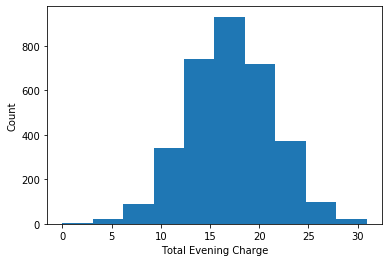

In [133]:
plt.hist(data['total eve charge'])
plt.xlabel('Total Evening Charge')
plt.ylabel('Count')
plt.show();

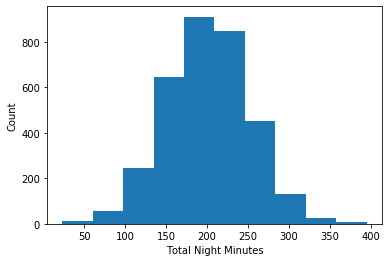

In [134]:
plt.hist(data['total night minutes'])
plt.xlabel('Total Night Minutes')
plt.ylabel('Count')
plt.show();

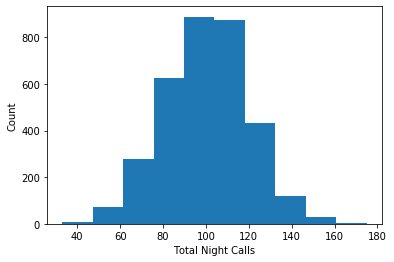

In [135]:
plt.hist(data['total night calls'])
plt.xlabel('Total Night Calls')
plt.ylabel('Count')
plt.show();

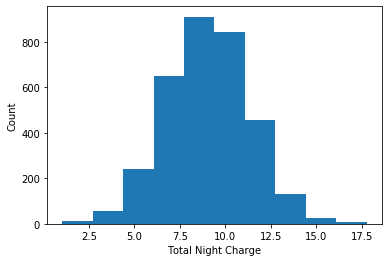

In [136]:
plt.hist(data['total night charge'])
plt.xlabel('Total Night Charge')
plt.ylabel('Count')
plt.show();

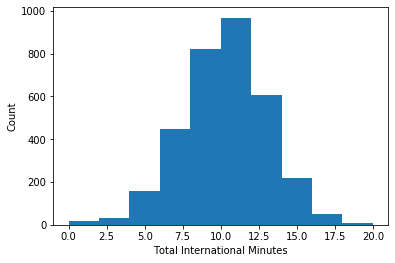

In [137]:
plt.hist(data['total intl minutes'])
plt.xlabel('Total International Minutes')
plt.ylabel('Count')
plt.show();

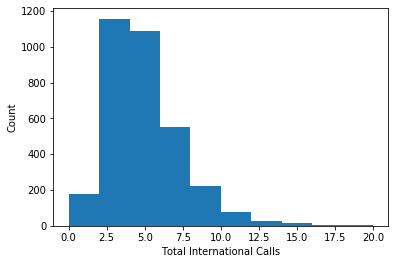

In [138]:
plt.hist(data['total intl calls'])
plt.xlabel('Total International Calls')
plt.ylabel('Count')
plt.show();

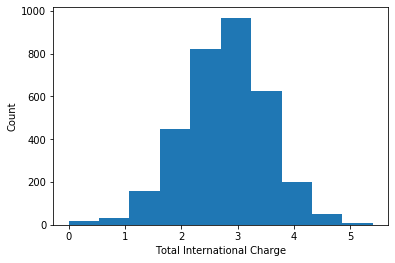

In [139]:
plt.hist(data['total intl charge'])
plt.xlabel('Total International Charge')
plt.ylabel('Count')
plt.show();

In [140]:
data.isnull().values.any()

False

It appears that there are no null values in the dataset. We will simulate missing data by replacing some values with np.nan to practice handling missing data.

In [141]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [142]:
index_values = data.index.tolist()
random.seed(1)
replace_these = random.sample(index_values, k=563)
replace_these_1 = random.sample(index_values, k=343)
replace_these_2 = random.sample(index_values, k=423)
replace_these_3 = random.sample(index_values, k=239)
replace_these_4 = random.sample(index_values, k=428)
replace_these_5 = random.sample(index_values, k=174)
for i in replace_these:
    data['state'][i] = np.nan 
for i in replace_these_1:
    data['area code'][i] = np.nan 
for i in replace_these_2:
    data['total day minutes'][i] = np.nan    
for i in replace_these_3:
    data['total eve minutes'][i] = np.nan  
for i in replace_these_4:
    data['total night minutes'][i] = np.nan  
for i in replace_these_5:
    data['total intl minutes'][i] = np.nan  

In [143]:
data.isnull().sum()

state                     563
account length              0
area code                 343
phone number                0
international plan          0
voice mail plan             0
number vmail messages       0
total day minutes         423
total day calls             0
total day charge            0
total eve minutes         239
total eve calls             0
total eve charge            0
total night minutes       428
total night calls           0
total night charge          0
total intl minutes        174
total intl calls            0
total intl charge           0
customer service calls      0
churn                       0
dtype: int64

We now have >5% missing data in 6 continuous variable columns. We can impute using a KNN algorithm to get closer to actual values. This could provide better imputed values compared to just imputing the median or mean value of the feature. We can only use the continuous columns for this. 

In [144]:
to_impute = data[data.columns[6:-2]] 
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_imputed = pd.DataFrame(imputer.fit_transform(to_impute))
data_imputed.columns = data.columns[6:-2]
for i in data_imputed.columns:
    data[i] = data_imputed[i]

In [145]:
data.isnull().sum()

state                     563
account length              0
area code                 343
phone number                0
international plan          0
voice mail plan             0
number vmail messages       0
total day minutes           0
total day calls             0
total day charge            0
total eve minutes           0
total eve calls             0
total eve charge            0
total night minutes         0
total night calls           0
total night charge          0
total intl minutes          0
total intl calls            0
total intl charge           0
customer service calls      0
churn                       0
dtype: int64

As seen above, the 4 continuous columns which held NaN values have been imputed using the KNN imputer. The customer's state are values that cannot be imputed accurately. Furthermore, features like phone number, state, area code would not be very meaningful to the model and should be dropped from the input data.  

In [146]:
data = data.drop(columns=['state', 'area code', 'phone number'])
col_names = data.columns.tolist()

#### Scaling

In [147]:
data['international plan'] = data['international plan'].map( {'yes': 1, 'no': 0} ).astype(int)
data['voice mail plan'] = data['voice mail plan'].map( {'yes': 1, 'no': 0} ).astype(int) 
data['churn'] = data['churn'].map( {True: 1, False: 0} ).astype(int) 

In this instance, I believe a standard scaler is the correct scaling option because almost all of the continuous features are normally distributed. However, a min max scaler was used and model performance was evaluated. The min max scaler did not significantly change the classification power of any of the models. Each metric showed similar values regardless of how the dataset was scaled.  

In [148]:
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.70,91.0,11.01,10.0,3.0,2.70,1,0
1,107,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.40,103.0,11.45,13.7,3.0,3.70,1,0
2,137,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,203.96,104.0,7.32,12.2,5.0,3.29,0,0
3,84,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.90,89.0,8.86,6.6,7.0,1.78,2,0
4,75,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.90,121.0,8.41,10.1,3.0,2.73,3,0


In [149]:
categorical= data[['international plan', 'voice mail plan', 'churn']]
data_to_fit_scaler = data.drop(columns=['international plan', 'voice mail plan', 'churn'])

In [150]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data_to_fit_scaler))

In [151]:
final_df = pd.concat([scaled_df, categorical], axis=1)
final_df.columns = col_names

In [152]:
X = final_df[data.columns[:-1]]
y = final_df[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### KNN

In [153]:
optimized_knn = KNeighborsClassifier()
params = {'n_neighbors': range(1, 20, 1)}

opt_knn = GridSearchCV(optimized_knn, params, cv=10) 
opt_knn.fit(X_train,y_train)
print("Best Parameters:", opt_knn.best_params_)
print("Best KNN cross-validation score: {:.3f}".format(opt_knn.best_score_))
results_knn = pd.DataFrame(opt_knn.cv_results_)
## results_knn.head() - see results

Best Parameters: {'n_neighbors': 5}
Best KNN cross-validation score: 0.888


### Grid Search Metrics - KNN

AUC Index: 0.7815323214609663


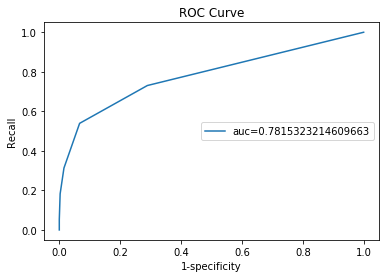


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       719
           1       0.77      0.31      0.44       115

    accuracy                           0.89       834
   macro avg       0.83      0.65      0.69       834
weighted avg       0.88      0.89      0.87       834


Confusion matrix:
[[708  11]
 [ 79  36]]

KNN Precision score: 0.7660
KNN Recall score: 0.3130
KNN Accuracy score: 0.8921
KNN F1 score: 0.4444


In [154]:
grid_knn_y_pred = opt_knn.best_estimator_.predict(X_test)
grid_knn_probs = opt_knn.best_estimator_.predict_proba(X_test)
grid_knn_AUC = roc_auc_score(y_test, grid_knn_probs[:, 1])

print("AUC Index:", grid_knn_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_knn_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_knn_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show() 

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_knn_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_knn_y_pred))

print('\nKNN Precision score: {:.4f}'.format(precision_score(y_test, grid_knn_y_pred)))
print('KNN Recall score: {:.4f}'.format(recall_score(y_test, grid_knn_y_pred)))
print('KNN Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_knn_y_pred)))
print('KNN F1 score: {:.4f}'.format(f1_score(y_test, grid_knn_y_pred)))

### Logistic Regression

In [155]:
optimized_logreg = LogisticRegression()
params = {'C': np.arange(0.001, 10.001, 0.5)}

opt_logreg = GridSearchCV(optimized_logreg, params, cv=10) 
opt_logreg.fit(X_train, y_train)
print("Best Parameters:", opt_logreg.best_params_)
print("Best cross-validation score: {:.3f}".format(opt_logreg.best_score_))
results_logreg = pd.DataFrame(opt_logreg.cv_results_)
## results_logreg.head() - see result df here

Best Parameters: {'C': 4.001}
Best cross-validation score: 0.854


### Grid Search Metrics - logistic regression

AUC Index: 0.8176210920965109


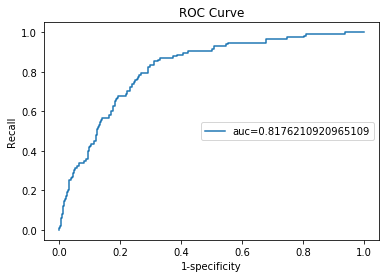


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       719
           1       0.55      0.19      0.28       115

    accuracy                           0.87       834
   macro avg       0.72      0.58      0.61       834
weighted avg       0.84      0.87      0.84       834


Confusion matrix:
[[701  18]
 [ 93  22]]

Logistic Regression Precision score: 0.5500
Logistic Regression Recall score: 0.1913
Logistic Regression Accuracy score: 0.8669
Logistic Regression F1 score: 0.2839


In [156]:
grid_logreg_y_pred = opt_logreg.best_estimator_.predict(X_test)
grid_logreg_probs = opt_logreg.best_estimator_.predict_proba(X_test)
grid_logreg_AUC = roc_auc_score(y_test, grid_logreg_probs[:, 1])

print("AUC Index:", grid_logreg_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_logreg_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_logreg_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_logreg_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_logreg_y_pred))

print('\nLogistic Regression Precision score: {:.4f}'.format(precision_score(y_test, grid_logreg_y_pred)))
print('Logistic Regression Recall score: {:.4f}'.format(recall_score(y_test, grid_logreg_y_pred)))
print('Logistic Regression Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_logreg_y_pred)))
print('Logistic Regression F1 score: {:.4f}'.format(f1_score(y_test, grid_logreg_y_pred)))

### Linear SVM

In [157]:
optimized_linearSVM = LinearSVC()
params = {'C': np.arange(0.001, 10.001, 0.5)}

opt_linSVM = GridSearchCV(optimized_linearSVM, params, cv=10)  
opt_linSVM.fit(X_train, y_train)
print("Best Parameters:", opt_linSVM.best_params_)
print("Best cross-validation score: {:.3f}".format(opt_linSVM.best_score_))
results_linSVM = pd.DataFrame(opt_linSVM.cv_results_)
## results_linSVM.head() - see results df here

Best Parameters: {'C': 7.501}
Best cross-validation score: 0.858


### Grid Search Metrics - linear SVM

AUC Index: 0.8190481949567636


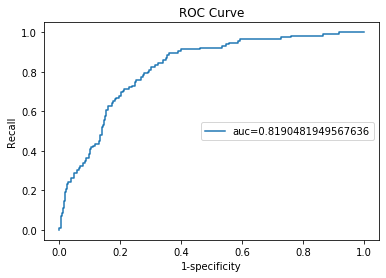


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       719
           1       0.57      0.15      0.23       115

    accuracy                           0.87       834
   macro avg       0.72      0.56      0.58       834
weighted avg       0.84      0.87      0.83       834


Confusion matrix:
[[706  13]
 [ 98  17]]

Linear SVM Precision score: 0.5667
Linear SVM Recall score: 0.1478
Linear SVM Accuracy score: 0.8669
Linear SVM F1 score: 0.2345


In [158]:
grid_linSVM_y_pred = opt_linSVM.best_estimator_.predict(X_test)
grid_linSVM_dec_func = opt_linSVM.best_estimator_.decision_function(X_test)
grid_linSVM_AUC = roc_auc_score(y_test, grid_linSVM_dec_func)

print("AUC Index:", grid_linSVM_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_linSVM_dec_func)
plt.plot(fpr,tpr,label="auc="+str(grid_linSVM_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_linSVM_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_linSVM_y_pred))

print('\nLinear SVM Precision score: {:.4f}'.format(precision_score(y_test, grid_linSVM_y_pred)))
print('Linear SVM Recall score: {:.4f}'.format(recall_score(y_test, grid_linSVM_y_pred)))
print('Linear SVM Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_linSVM_y_pred)))
print('Linear SVM F1 score: {:.4f}'.format(f1_score(y_test, grid_linSVM_y_pred)))

### Linear SVM (kernel)

In [159]:
optimized_linearSVMk = SVC(kernel='linear')
params = {'C': np.arange(0.001, 10.001, 0.5)}

opt_linSVMk = GridSearchCV(optimized_linearSVMk, params, cv=10) 
opt_linSVMk.fit(X_train, y_train)
print("Best Parameters:", opt_linSVMk.best_params_)
print("Best cross-validation score: {:.3f}".format(opt_linSVMk.best_score_))
results_linSVMk = pd.DataFrame(opt_linSVMk.cv_results_)
## results_linSVMk.head() - see results of cv splits here

Best Parameters: {'C': 0.001}
Best cross-validation score: 0.853


### Grid Search Metrics - linear SVM (kernel)

AUC Index: 0.8005563282336579


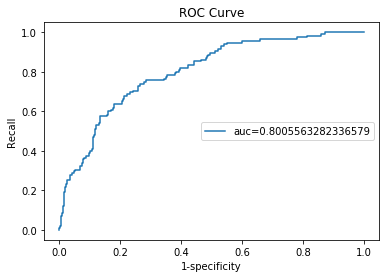


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       719
           1       0.00      0.00      0.00       115

    accuracy                           0.86       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.74      0.86      0.80       834


Confusion matrix:
[[719   0]
 [115   0]]

Linear SVM (kernel) Precision score: 0.0000
Linear SVM (kernel) Recall score: 0.0000
Linear SVM (kernel) Accuracy score: 0.8621
Linear SVM (kernel) F1 score: 0.0000


In [160]:
grid_linSVMk_y_pred = opt_linSVMk.best_estimator_.predict(X_test)
grid_linSVMk_dec_func = opt_linSVMk.best_estimator_.decision_function(X_test)
grid_linSVMk_AUC = roc_auc_score(y_test, grid_linSVMk_dec_func)

print("AUC Index:", grid_linSVMk_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_linSVMk_dec_func)
plt.plot(fpr,tpr,label="auc="+str(grid_linSVMk_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_linSVMk_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_linSVMk_y_pred))

print('\nLinear SVM (kernel) Precision score: {:.4f}'.format(precision_score(y_test, grid_linSVMk_y_pred)))
print('Linear SVM (kernel) Recall score: {:.4f}'.format(recall_score(y_test, grid_linSVMk_y_pred)))
print('Linear SVM (kernel) Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_linSVMk_y_pred)))
print('Linear SVM (kernel) F1 score: {:.4f}'.format(f1_score(y_test, grid_linSVMk_y_pred)))

### RBF SVM (kernel)

In [161]:
optimized_rbfSVM = SVC(kernel='rbf')
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

opt_rbfSVM = GridSearchCV(optimized_rbfSVM, params, cv=10) 
opt_rbfSVM.fit(X_train, y_train)
print("Best Parameters:", opt_rbfSVM.best_params_)
print("Best cross-validation score: {:.3f}".format(opt_rbfSVM.best_score_))
results_rbfSVM = pd.DataFrame(opt_rbfSVM.cv_results_)
# results_rbfSVM.head() - see results of cv splits here

Best Parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.916


### Grid Search Metrics - RBF SVM (kernel)

AUC Index: 0.9108907298784544


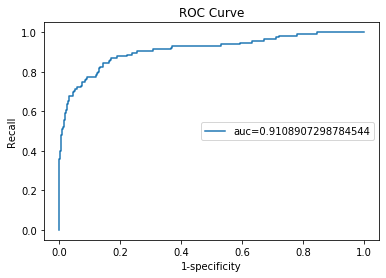


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       719
           1       0.80      0.62      0.70       115

    accuracy                           0.93       834
   macro avg       0.87      0.80      0.83       834
weighted avg       0.92      0.93      0.92       834


Confusion matrix:
[[701  18]
 [ 44  71]]

RBF SVM (kernel) Precision score: 0.7978
RBF SVM (kernel) Recall score: 0.6174
RBF SVM (kernel) Accuracy score: 0.9257
RBF SVM (kernel) F1 score: 0.6961


In [162]:
grid_rbfSVM_y_pred = opt_rbfSVM.best_estimator_.predict(X_test)
grid_rbfSVM_dec_func = opt_rbfSVM.best_estimator_.decision_function(X_test)
grid_rbfSVM_AUC = roc_auc_score(y_test, grid_rbfSVM_dec_func)

print("AUC Index:", grid_rbfSVM_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_rbfSVM_dec_func)
plt.plot(fpr,tpr,label="auc="+str(grid_rbfSVM_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_rbfSVM_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_rbfSVM_y_pred))

print('\nRBF SVM (kernel) Precision score: {:.4f}'.format(precision_score(y_test, grid_rbfSVM_y_pred)))
print('RBF SVM (kernel) Recall score: {:.4f}'.format(recall_score(y_test, grid_rbfSVM_y_pred)))
print('RBF SVM (kernel) Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_rbfSVM_y_pred)))
print('RBF SVM (kernel) F1 score: {:.4f}'.format(f1_score(y_test, grid_rbfSVM_y_pred)))

### Poly SVM (kernel)

In [163]:
## Perpetually running with no result, when params are added. Cross validation still occurs
optimized_polySVM = SVC(kernel='poly', degree=3)
params = {}
opt_polySVM = GridSearchCV(optimized_polySVM, params, cv=10) ## folds in stratified k-fold. 
opt_polySVM.fit(X_train, y_train)
print("Best Parameters:", opt_polySVM.best_params_)
print("Best cross-validation score: {:.3f}".format(opt_polySVM.best_score_))
results_polySVM = pd.DataFrame(opt_polySVM.cv_results_)
results_polySVM.head()

Best Parameters: {}
Best cross-validation score: 0.906


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082836,0.003607,0.004491,0.000182,{},0.912,0.92,0.896,0.92,0.88,0.9,0.92,0.908,0.908,0.891566,0.905557,0.012847,1


### Grid Search Metrics - Poly SVM (kernel)

AUC Index: 0.8737860555118825


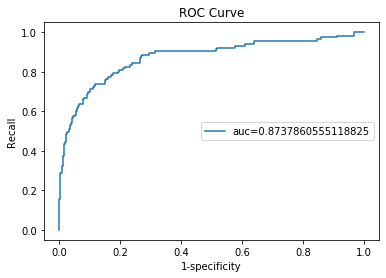


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       719
           1       0.80      0.42      0.55       115

    accuracy                           0.91       834
   macro avg       0.86      0.70      0.75       834
weighted avg       0.90      0.91      0.89       834


Confusion matrix:
[[707  12]
 [ 67  48]]

Poly SVM (kernel) Precision score: 0.8000
Poly SVM (kernel) Recall score: 0.4174
Poly SVM (kernel) Accuracy score: 0.9053
Poly SVM (kernel) F1 score: 0.5486


In [164]:
grid_polySVM_y_pred = opt_polySVM.best_estimator_.predict(X_test)
grid_polySVM_dec_func = opt_polySVM.best_estimator_.decision_function(X_test)
grid_polySVM_AUC = roc_auc_score(y_test, grid_polySVM_dec_func)

print("AUC Index:", grid_polySVM_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_polySVM_dec_func)
plt.plot(fpr,tpr,label="auc="+str(grid_polySVM_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_polySVM_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_polySVM_y_pred))

print('\nPoly SVM (kernel) Precision score: {:.4f}'.format(precision_score(y_test, grid_polySVM_y_pred)))
print('Poly SVM (kernel) Recall score: {:.4f}'.format(recall_score(y_test, grid_polySVM_y_pred)))
print('Poly SVM (kernel) Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_polySVM_y_pred)))
print('Poly SVM (kernel) F1 score: {:.4f}'.format(f1_score(y_test, grid_polySVM_y_pred)))

### Decision Tree

In [165]:
optimized_tree = DecisionTreeClassifier()
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,10)}

opt_tree = GridSearchCV(optimized_tree, params, cv=10) 
opt_tree.fit(X_train,y_train)
print("Best Parameters:", opt_tree.best_params_)
print("Best cross-validation score: {:.3f}".format(opt_tree.best_score_))
results_tree = pd.DataFrame(opt_tree.cv_results_)
# results_tree.head() - see results of cv splits here

Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_split': 3}
Best cross-validation score: 0.925


### Grid Search Metrics - Decision Tree

AUC Index: 0.8566668682348673


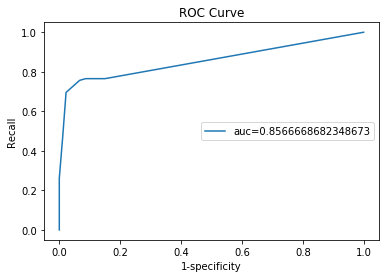


Classification accuracy report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       719
           1       0.83      0.70      0.76       115

    accuracy                           0.94       834
   macro avg       0.89      0.84      0.86       834
weighted avg       0.94      0.94      0.94       834


Confusion matrix:
[[703  16]
 [ 35  80]]

Decision Tree Precision score: 0.8333
Decision Tree Recall score: 0.6957
Decision Tree Accuracy score: 0.9388
Decision Tree F1 score: 0.7583


In [166]:
grid_tree_y_pred = opt_tree.best_estimator_.predict(X_test)
grid_tree_probs = opt_tree.best_estimator_.predict_proba(X_test)
grid_tree_AUC = roc_auc_score(y_test, grid_tree_probs[:, 1])

print("AUC Index:", grid_tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_tree_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

print('\nClassification accuracy report:')
print(classification_report(y_test, grid_tree_y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, grid_tree_y_pred))

print('\nDecision Tree Precision score: {:.4f}'.format(precision_score(y_test, grid_tree_y_pred)))
print('Decision Tree Recall score: {:.4f}'.format(recall_score(y_test, grid_tree_y_pred)))
print('Decision Tree Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_tree_y_pred)))
print('Decision Tree F1 score: {:.4f}'.format(f1_score(y_test, grid_tree_y_pred)))

## Extra model 
### Random Forest - using best parameters from opt_tree.

Random Forest Precision score: 1.0000
Recall score: 0.2174
Accuracy score: 0.8921
F1 score: 0.3571

AUC Index: 0.9075043841083631


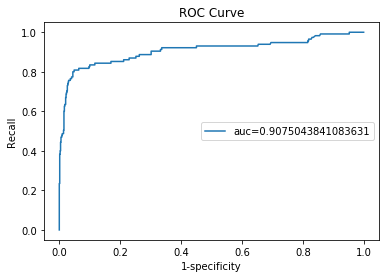

In [170]:
## Grid Search was running perpetually, so we use the best estimator params from the decision tree. 
random_forest_clf = RandomForestClassifier(n_estimators=200, max_depth=5, max_leaf_nodes=8, min_samples_split=3)
random_forest_clf.fit(X_train, y_train)
rf_y_pred = random_forest_clf.predict(X_test)
rf_probs = random_forest_clf.predict_proba(X_test)

## Metrics
print('Random Forest Precision score: {:.4f}'.format(precision_score(y_test,rf_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,rf_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,rf_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,rf_y_pred)))

rf_AUC = roc_auc_score(y_test, rf_probs[:, 1]) 
print("\nAUC Index:", rf_AUC)
fpr, tpr, threshold = roc_curve(y_test,  rf_probs[:, 1]) 
plt.plot(fpr,tpr,label="auc="+str(rf_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

### Dummy Classifiers

In [171]:
most_freq_dummy = DummyClassifier(strategy='most_frequent')
most_freq_dummy.fit(X_train, y_train)
most_freq_y_pred = most_freq_dummy.predict(X_test)

print('Most Frequent Precision score: {:.4f}'.format(precision_score(y_test, most_freq_y_pred)))
print('Most Frequent Recall score: {:.4f}'.format(recall_score(y_test, most_freq_y_pred)))
print('Most Frequent Accuracy score: {:.4f}'.format(accuracy_score(y_test, most_freq_y_pred)))
print('Most Frequent F1 score: {:.4f}'.format(f1_score(y_test, most_freq_y_pred)))


strat_dummy = DummyClassifier(strategy='stratified')
strat_dummy.fit(X_train, y_train)
strat_y_pred = strat_dummy.predict(X_test)

print('\nDummy Precision score: {:.4f}'.format(precision_score(y_test, strat_y_pred)))
print('Dummy Recall score: {:.4f}'.format(recall_score(y_test, strat_y_pred)))
print('Dummy Accuracy score: {:.4f}'.format(accuracy_score(y_test, strat_y_pred)))
print('Dummy F1 score: {:.4f}'.format(f1_score(y_test, strat_y_pred)))

random_dummy = DummyClassifier(strategy='uniform')
random_dummy.fit(X_train, y_train)
random_y_pred = random_dummy.predict(X_test)

print('\nRandom Dummy Precision score: {:.4f}'.format(precision_score(y_test, random_y_pred)))
print('Random Dummy Recall score: {:.4f}'.format(recall_score(y_test, random_y_pred)))
print('Random Dummy Accuracy score: {:.4f}'.format(accuracy_score(y_test, random_y_pred)))
print('Random Dummy F1 score: {:.4f}'.format(f1_score(y_test, random_y_pred)))

Most Frequent Precision score: 0.0000
Most Frequent Recall score: 0.0000
Most Frequent Accuracy score: 0.8621
Most Frequent F1 score: 0.0000

Dummy Precision score: 0.1415
Dummy Recall score: 0.1304
Dummy Accuracy score: 0.7710
Dummy F1 score: 0.1357

Random Dummy Precision score: 0.1144
Random Dummy Recall score: 0.4087
Random Dummy Accuracy score: 0.4820
Random Dummy F1 score: 0.1787


### Model Comparison

In [173]:
print('KNN Precision score: {:.4f}'.format(precision_score(y_test, grid_knn_y_pred)))
print('KNN Recall score: {:.4f}'.format(recall_score(y_test, grid_knn_y_pred)))
print('KNN Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_knn_y_pred)))
print('KNN F1 score: {:.4f}'.format(f1_score(y_test, grid_knn_y_pred)))

print('\nLogistic Regression Precision score: {:.4f}'.format(precision_score(y_test, grid_logreg_y_pred)))
print('Logistic Regression Recall score: {:.4f}'.format(recall_score(y_test, grid_logreg_y_pred)))
print('Logistic Regression Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_logreg_y_pred)))
print('Logistic Regression F1 score: {:.4f}'.format(f1_score(y_test, grid_logreg_y_pred)))

print('\nLinear SVM Precision score: {:.4f}'.format(precision_score(y_test, grid_linSVM_y_pred)))
print('Linear SVM Recall score: {:.4f}'.format(recall_score(y_test, grid_linSVM_y_pred)))
print('Linear SVM Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_linSVM_y_pred)))
print('Linear SVM F1 score: {:.4f}'.format(f1_score(y_test, grid_linSVM_y_pred)))

print('\nLinear SVM (kernel) Precision score: {:.4f}'.format(precision_score(y_test, grid_linSVMk_y_pred)))
print('Linear SVM (kernel) Recall score: {:.4f}'.format(recall_score(y_test, grid_linSVMk_y_pred)))
print('Linear SVM (kernel) Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_linSVMk_y_pred)))
print('Linear SVM (kernel) F1 score: {:.4f}'.format(f1_score(y_test, grid_linSVMk_y_pred)))

print('\nRBF SVM (kernel) Precision score: {:.4f}'.format(precision_score(y_test, grid_rbfSVM_y_pred)))
print('RBF SVM (kernel) Recall score: {:.4f}'.format(recall_score(y_test, grid_rbfSVM_y_pred)))
print('RBF SVM (kernel) Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_rbfSVM_y_pred)))
print('RBF SVM (kernel) F1 score: {:.4f}'.format(f1_score(y_test, grid_rbfSVM_y_pred)))

print('\nPoly SVM (kernel) Precision score: {:.4f}'.format(precision_score(y_test, grid_polySVM_y_pred)))
print('Poly SVM (kernel) Recall score: {:.4f}'.format(recall_score(y_test, grid_polySVM_y_pred)))
print('Poly SVM (kernel) Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_polySVM_y_pred)))
print('Poly SVM (kernel) F1 score: {:.4f}'.format(f1_score(y_test, grid_polySVM_y_pred)))

print('\nDecision Tree Precision score: {:.4f}'.format(precision_score(y_test, grid_tree_y_pred)))
print('Decision Tree Recall score: {:.4f}'.format(recall_score(y_test, grid_tree_y_pred)))
print('Decision Tree Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_tree_y_pred)))
print('Decision Tree F1 score: {:.4f}'.format(f1_score(y_test, grid_tree_y_pred)))

print('\nRandom Forest Precision score: {:.4f}'.format(precision_score(y_test,rf_y_pred)))
print('Random Forest Recall score: {:.4f}'.format(recall_score(y_test,rf_y_pred)))
print('Random Forest Accuracy score: {:.4f}'.format(accuracy_score(y_test,rf_y_pred)))
print('Random Forest F1 score: {:.4f}'.format(f1_score(y_test,rf_y_pred)))

KNN Precision score: 0.7660
KNN Recall score: 0.3130
KNN Accuracy score: 0.8921
KNN F1 score: 0.4444

Logistic Regression Precision score: 0.5500
Logistic Regression Recall score: 0.1913
Logistic Regression Accuracy score: 0.8669
Logistic Regression F1 score: 0.2839

Linear SVM Precision score: 0.5667
Linear SVM Recall score: 0.1478
Linear SVM Accuracy score: 0.8669
Linear SVM F1 score: 0.2345

Linear SVM (kernel) Precision score: 0.0000
Linear SVM (kernel) Recall score: 0.0000
Linear SVM (kernel) Accuracy score: 0.8621
Linear SVM (kernel) F1 score: 0.0000

RBF SVM (kernel) Precision score: 0.7978
RBF SVM (kernel) Recall score: 0.6174
RBF SVM (kernel) Accuracy score: 0.9257
RBF SVM (kernel) F1 score: 0.6961

Poly SVM (kernel) Precision score: 0.8000
Poly SVM (kernel) Recall score: 0.4174
Poly SVM (kernel) Accuracy score: 0.9053
Poly SVM (kernel) F1 score: 0.5486

Decision Tree Precision score: 0.8333
Decision Tree Recall score: 0.6957
Decision Tree Accuracy score: 0.9388
Decision Tree 

Based on a combination of all 4 different metrics listed above (precision, recall, accuracy, and the F1 score), the decision tree gives us the best results. Since the dataset is skewed the no information rate of any model we build will be high. To choose the most effective model we should study a combination of different metrics such as, recall, precision, and the F1 score. The decision tree provides us with a good balance of recall and precision. Most other models favor precision greatly while sacrificing the model's sensitivity.